In [107]:
import numpy as np
import joblib ### para cargar array

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  ### para analizar modelo
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC



In [2]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')


Modelo Random 

In [3]:
x_test.shape

(1737, 100, 100, 3)

In [4]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

In [5]:
rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

pred_train=rf.predict(x_train2)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

pred_test=rf.predict(x_test2)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2864
           1       1.00      1.00      1.00      4089

    accuracy                           1.00      6953
   macro avg       1.00      1.00      1.00      6953
weighted avg       1.00      1.00      1.00      6953

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       716
           1       0.99      0.98      0.99      1021

    accuracy                           0.99      1737
   macro avg       0.98      0.99      0.98      1737
weighted avg       0.99      0.99      0.99      1737



0.9851813043406891

## modelo Red neuronal

In [7]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
##### configura el optimizador y la función para optimizar ##############
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])


In [9]:
#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - AUC: 0.6366 - Precision: 0.6966 - Recall: 0.6471 - accuracy: 0.6251 - loss: 1.4584 - val_AUC: 0.9526 - val_Precision: 0.9488 - val_Recall: 0.9079 - val_accuracy: 0.9171 - val_loss: 0.2895
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - AUC: 0.9517 - Precision: 0.9174 - Recall: 0.9268 - accuracy: 0.9076 - loss: 0.2852 - val_AUC: 0.9661 - val_Precision: 0.9483 - val_Recall: 0.9530 - val_accuracy: 0.9419 - val_loss: 0.2155
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - AUC: 0.9776 - Precision: 0.9529 - Recall: 0.9609 - accuracy: 0.9490 - loss: 0.1920 - val_AUC: 0.9823 - val_Precision: 0.9680 - val_Recall: 0.9491 - val_accuracy: 0.9516 - val_loss: 0.1711
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - AUC: 0.9823 - Precision: 0.9591 - Recall: 0.9608 - accuracy: 0.9527 - loss: 0.1670 - val_AUC: 0.9828 - val_Precision: 0.9553 - val_Recall: 0.9638 - val_accuracy: 0.9522 - val_loss: 0.1617
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━

In [10]:
#########Evaluar el modelo ####################
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

55/55 - 0s - 6ms/step - AUC: 0.9915 - Precision: 0.9794 - Recall: 0.9785 - accuracy: 0.9752 - loss: 0.1095
Test auc: 0.9915141463279724


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       716
           1       0.98      0.94      0.96      1021

    accuracy                           0.96      1737
   macro avg       0.95      0.96      0.95      1737
weighted avg       0.96      0.96      0.96      1737



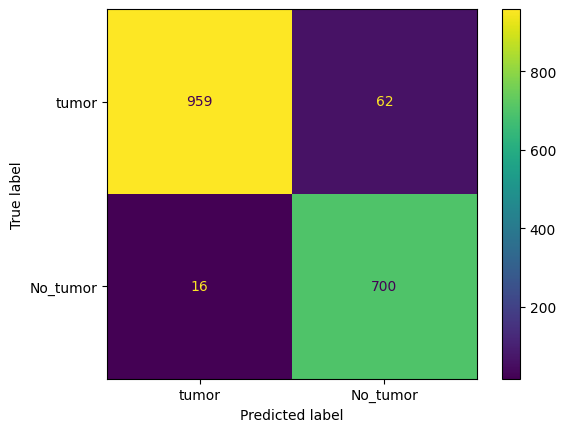

In [125]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.80).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


In [122]:
import plotly.express as px
p = fc_model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


### modelos convolusionales

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Analitica 3\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [14]:
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - AUC: 0.7932 - loss: 0.5144 - val_AUC: 0.9844 - val_loss: 0.1597
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - AUC: 0.9837 - loss: 0.1639 - val_AUC: 0.9901 - val_loss: 0.1333
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - AUC: 0.9936 - loss: 0.1032 - val_AUC: 0.9925 - val_loss: 0.1064
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - AUC: 0.9969 - loss: 0.0678 - val_AUC: 0.9940 - val_loss: 0.0856
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - AUC: 0.9977 - loss: 0.0605 - val_AUC: 0.9942 - val_loss: 0.0660
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - AUC: 0.9991 - loss: 0.0352 - val_AUC: 0.9943 - val_loss: 0.0660
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - AUC: 0.9997 - loss: 0.0211 - val_AUC: 0.9940 - val_loss: 0.0578
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - AUC: 0.9999 - loss: 0.0138 - val_AUC: 0.9943 - val_loss: 0.0560
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       716
           1       1.00      0.98      0.99      1021

    accuracy                           0.98      1737
   macro avg       0.98      0.98      0.98      1737
weighted avg       0.98      0.98      0.98      1737



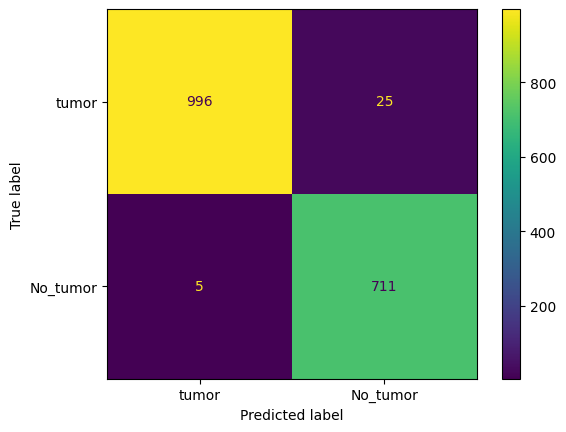

In [137]:
pred_test1=(model.predict(x_test) >= 0.95).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))


In [129]:
p = model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [135]:
falsos_n = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    # Si la predicción es 0 (no hay tumor) 
    if pred_test1[i] == 0 and y_test[i] == 1:
        falsos_n.append(i)

falsos_n

[791, 1230, 1726, 1727, 1728, 1735, 1736]

In [136]:
falsos_p = []

# Iterar sobre las predicciones y las etiquetas verdaderas
for i in range(len(pred_test1)):
    if pred_test1[i] == 1 and y_test[i] == 0:
        falsos_p.append(i)

falsos_p

[146, 398, 412, 415, 438, 456, 457, 472, 473]